<a href="https://colab.research.google.com/github/sharsh09/GRIP-INTERNSHIP-DSBA/blob/main/GRiP_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Harsh M Singh

Data Science & Business Analytics @ The Spark Foundation (TSF)

Task-1: Predicting students percentage based on number of hours study.

Batch: September 2023

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv("student_scores.csv")

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.shape

(25, 2)

In [ ]:
df.size

50

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.duplicated().sum()

0

#Data Visualization

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: >

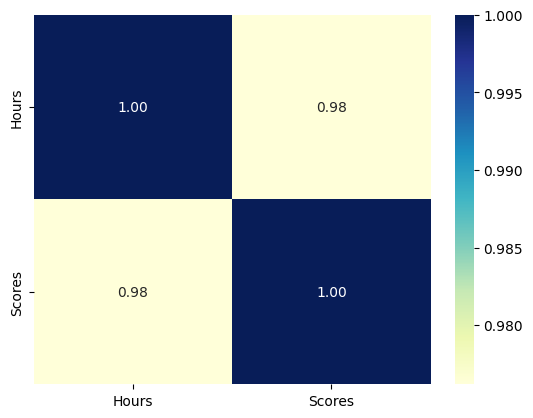

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu',fmt=".2f")

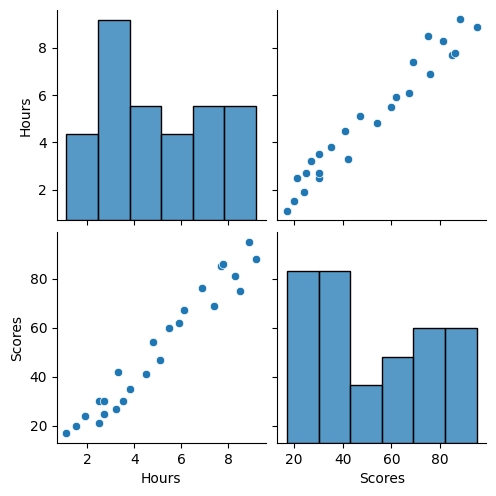

In [ ]:
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


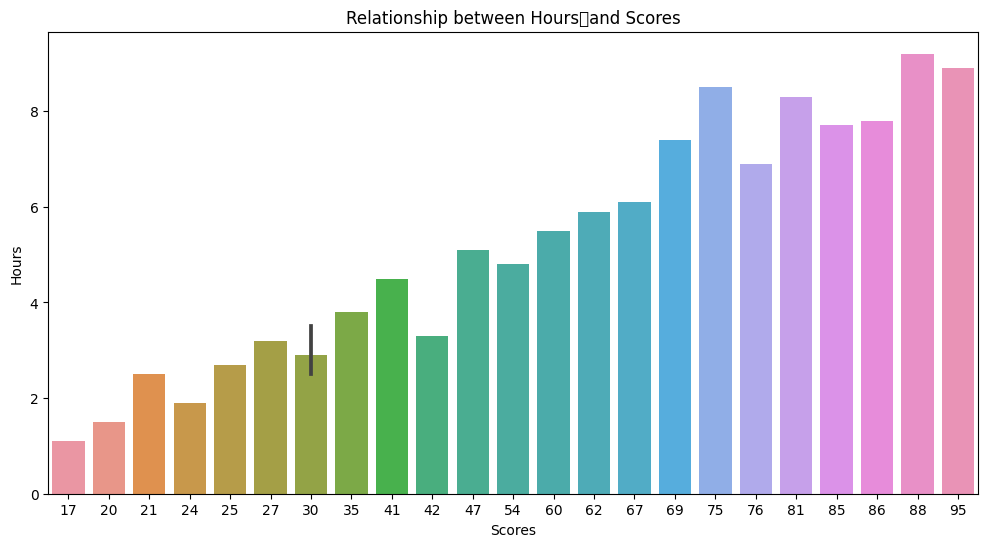

In [ ]:
#Relationship between Hours	and Scores
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Scores', y='Hours')
plt.title('Relationship between Hours	and Scores')
plt.show()

#Separating Features and Target

In [ ]:
x = df.drop(['Scores'], axis=1)
y = df["Scores"]

#Model Training

In [ ]:
# Spliting the data into training and testing dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [ ]:
x_train

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [ ]:
y_train

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [ ]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [ ]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

#Linear Regression

In [ ]:
# Loading the Regressor Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Fitting the model
model.fit(x_train, y_train)

LinearRegression()

#Model Evaluation

In [ ]:
#PREDICT THE OUTPUT
y_pred = model.predict(x_test)
y_pred #PREDCITED VALUES

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
y_test #ACTUAL VALUES

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

#Accuracy

In [ ]:
model.score(x_train,y_train)

0.9515510725211552

In [ ]:
model.score(x_test,y_test)

0.9454906892105354

In [ ]:
from sklearn import metrics #the mean absolute error
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.183859899002982


As we can see the mean absolute error is very less, thus we conclude that our model is working fine.

#Prediction

In [ ]:
hours = [[9.25]] #accordingly if a student studies for 9.25 hrs/day, then the predicted score is to be 93
pred = model.predict(hours)
print("Predicted Score: ", pred)

Predicted Score:  [93.69173249]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
